In [1]:
#Task 1

In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv("diabetes-data.txt")
data.columns = ['Number of times pregnant','Plasma glucose concentration a 2 hours in an oral glucose tolerance test',
                'Diastolic blood pressure (mm Hg)','Triceps skin fold thickness (mm)'
               ,'2-Hour serum insulin (mu U/ml)'
               ,'Body mass index (weight in kg/(height in m)^2)'
               ,'Diabetes pedigree function','Age','Class variable']
data.describe()

,Class variable
count,767.000000
mean,0.348110
std,0.476682
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [3]:
X=data.iloc[ : , data.columns != 'Class variable'].values
Y=data.iloc[:,8].values

In [4]:
#KNN implementation
from collections import Counter
def euclidian_distance(a,b):
    half=np.sum(a-b)**2
    return (np.sqrt(half))

class KNN():

    X_train=0
    Y_train=0
    test_size=45
    k=0
    def __init__(self, k, scalefeatures=False):        
        self.k=k
    def fit(self,x,y):
        self.X_train=x
        self.Y_train=y
        
    
    def Compute_distances(self,X):
        dists=[euclidian_distance(X,x1) for x1 in self.X_train]
        dists2= np.argsort(dists)[:self.k]
        dist3=[self.Y_train[i] for i in dists2]
        dist4= Counter(dist3).most_common(1)
        return dist4[0][0]
    
    def predict(self,X):
        pclass = [self.Compute_distances(x) for x in X ]
        return np.array(pclass)

In [5]:
df=data
df



,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age,Class variable
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
762,10,101,76,48,180,32.9,0.171,63,0
763,2,122,70,27,0,36.8,0.340,27,0
764,5,121,72,23,112,26.2,0.245,30,0
765,1,126,60,0,0,30.1,0.349,47,1


In [6]:
#Replacing ? to NaN

In [7]:
df['Number of times pregnant'] = df['Number of times pregnant'].str.replace('?', '')
df['Age'] = df['Age'].str.replace('?', '')
df['Diabetes pedigree function'] = df['Diabetes pedigree function'].str.replace('?', '')
df['Body mass index (weight in kg/(height in m)^2)'] = df['Body mass index (weight in kg/(height in m)^2)'].str.replace('?', '')
df['2-Hour serum insulin (mu U/ml)'] = df['2-Hour serum insulin (mu U/ml)'].str.replace('?', '')
df['Triceps skin fold thickness (mm)'] = df['Triceps skin fold thickness (mm)'].str.replace('?', '')
df['Diastolic blood pressure (mm Hg)'] = df['Diastolic blood pressure (mm Hg)'].str.replace('?', '')
df['Plasma glucose concentration a 2 hours in an oral glucose tolerance test'] = df['Plasma glucose concentration a 2 hours in an oral glucose tolerance test'].str.replace('?', '')

In [8]:
#Converting data to numeric

In [9]:
df=df.apply(pd.to_numeric)

In [10]:

df['Body mass index (weight in kg/(height in m)^2)'] = df['Body mass index (weight in kg/(height in m)^2)'].replace(0,np.NaN)
df['2-Hour serum insulin (mu U/ml)'] = df['2-Hour serum insulin (mu U/ml)'].replace(0,np.NaN)
df['Triceps skin fold thickness (mm)'] = df['Triceps skin fold thickness (mm)'].replace(0,np.NaN)
df['Diastolic blood pressure (mm Hg)'] = df['Diastolic blood pressure (mm Hg)'].replace(0,np.NaN)
df['Plasma glucose concentration a 2 hours in an oral glucose tolerance test'] = df['Plasma glucose concentration a 2 hours in an oral glucose tolerance test'].replace(0,np.NaN)

In [11]:
# Adding missing values

In [12]:
df['Number of times pregnant'] = df['Number of times pregnant'].fillna(df['Number of times pregnant'].median())
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Diabetes pedigree function'] = df['Diabetes pedigree function'].fillna(df['Diabetes pedigree function'].median())
df['Body mass index (weight in kg/(height in m)^2)'] = df['Body mass index (weight in kg/(height in m)^2)'].fillna(df['Body mass index (weight in kg/(height in m)^2)'].median())
df['2-Hour serum insulin (mu U/ml)'] = df['2-Hour serum insulin (mu U/ml)'].fillna(df['2-Hour serum insulin (mu U/ml)'].median())
df['Triceps skin fold thickness (mm)'] = df['Triceps skin fold thickness (mm)'].fillna(df['Triceps skin fold thickness (mm)'].median())
df['Diastolic blood pressure (mm Hg)'] = df['Diastolic blood pressure (mm Hg)'].fillna(df['Diastolic blood pressure (mm Hg)'].median())
df['Plasma glucose concentration a 2 hours in an oral glucose tolerance test'] = df['Plasma glucose concentration a 2 hours in an oral glucose tolerance test'].fillna(df['Plasma glucose concentration a 2 hours in an oral glucose tolerance test'].median())

In [13]:
#Giving values to X and Y 
X=df.iloc[ : , df.columns != 'Class variable'].values
Y=df.iloc[:,8].values
df.describe()


,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age,Class variable
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.846154,121.629726,72.361147,29.113429,140.095176,32.456454,0.471192,33.179922,0.348110
std,3.368927,30.441290,12.021356,8.786794,85.166555,6.879058,0.331429,11.716248,0.476682
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.500000,64.000000,25.000000,123.500000,27.500000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.370000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,126.000000,36.600000,0.621500,40.500000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [14]:
df.isnull().sum()
df.isna().sum()

Number of times pregnant                                                    0
Plasma glucose concentration a 2 hours in an oral glucose tolerance test    0
Diastolic blood pressure (mm Hg)                                            0
Triceps skin fold thickness (mm)                                            0
2-Hour serum insulin (mu U/ml)                                              0
Body mass index (weight in kg/(height in m)^2)                              0
Diabetes pedigree function                                                  0
Age                                                                         0
Class variable                                                              0
dtype: int64

In [15]:
df.describe()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age,Class variable
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.846154,121.629726,72.361147,29.113429,140.095176,32.456454,0.471192,33.179922,0.348110
std,3.368927,30.441290,12.021356,8.786794,85.166555,6.879058,0.331429,11.716248,0.476682
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.500000,64.000000,25.000000,123.500000,27.500000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.370000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,126.000000,36.600000,0.621500,40.500000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [16]:
#Normalization of data
from sklearn import preprocessing
x = X
min_max_scaler = preprocessing.MinMaxScaler()
print(x)
x_scaled = min_max_scaler.fit_transform(x)
d2 = pd.DataFrame(x_scaled,columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])
X=d2.values
d2.describe().T

[[1.00e+00 8.50e+01 6.60e+01 ... 2.66e+01 3.51e-01 3.10e+01]
 [8.00e+00 1.83e+02 6.40e+01 ... 2.33e+01 6.72e-01 3.20e+01]
 [1.00e+00 8.90e+01 6.60e+01 ... 2.81e+01 1.67e-01 2.10e+01]
 ...
 [5.00e+00 1.21e+02 7.20e+01 ... 2.62e+01 2.45e-01 3.00e+01]
 [1.00e+00 1.26e+02 6.00e+01 ... 3.01e+01 3.49e-01 4.70e+01]
 [1.00e+00 9.30e+01 7.00e+01 ... 3.04e+01 3.15e-01 2.30e+01]]


,count,mean,std,min,25%,50%,75%,max
Pregnancies,767.0,0.226244,0.198172,0.0,0.058824,0.176471,0.352941,1.0
Glucose,767.0,0.500837,0.196395,0.0,0.358065,0.470968,0.619355,1.0
BloodPressure,767.0,0.493481,0.122667,0.0,0.408163,0.489796,0.571429,1.0
SkinThickness,767.0,0.240363,0.095509,0.0,0.195652,0.239130,0.271739,1.0
Insulin,767.0,0.151557,0.102364,0.0,0.131611,0.133413,0.134615,1.0
BMI,767.0,0.291543,0.140676,0.0,0.190184,0.288344,0.376278,1.0
DiabetesPedigreeFunction,767.0,0.167887,0.141515,0.0,0.070666,0.124680,0.232067,1.0
Age,767.0,0.202999,0.195271,0.0,0.050000,0.133333,0.325000,1.0


In [17]:
#Now features selection

In [18]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE

In [19]:
print(X)
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, Y)

# Summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)

features = fit.transform(X)
# Summarize selected features
print(features)

[[0.05882353 0.26451613 0.42857143 ... 0.17177914 0.11656704 0.16666667]
 [0.47058824 0.89677419 0.40816327 ... 0.10429448 0.25362938 0.18333333]
 [0.05882353 0.29032258 0.42857143 ... 0.20245399 0.03800171 0.        ]
 ...
 [0.29411765 0.49677419 0.48979592 ... 0.16359918 0.07130658 0.15      ]
 [0.05882353 0.52903226 0.36734694 ... 0.24335378 0.11571307 0.43333333]
 [0.05882353 0.31612903 0.46938776 ... 0.24948875 0.10119556 0.03333333]]
[ 6.457 14.275  0.602  1.32   2.002  5.057  2.777  8.259]
[[0.059 0.265 0.172 0.167]
 [0.471 0.897 0.104 0.183]
 [0.059 0.29  0.202 0.   ]
 ...
 [0.294 0.497 0.164 0.15 ]
 [0.059 0.529 0.243 0.433]
 [0.059 0.316 0.249 0.033]]


In [20]:
#discreatization
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import LabelEncoder

X = X.astype('float32')
y = LabelEncoder().fit_transform(Y.astype('str'))

In [21]:
trans = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='kmeans')
data = trans.fit_transform(X)
data
data_fordiscreat1=pd.DataFrame(data,columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])
data_fordiscreat1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.0,2.0,4.0,3.0,1.0,1.0,1.0,1.0
1,4.0,8.0,3.0,3.0,1.0,0.0,2.0,1.0
2,0.0,2.0,4.0,2.0,1.0,1.0,0.0,0.0
3,0.0,6.0,1.0,4.0,2.0,5.0,9.0,2.0
4,2.0,4.0,5.0,3.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...
762,5.0,3.0,5.0,6.0,2.0,3.0,0.0,7.0
763,1.0,5.0,4.0,3.0,1.0,4.0,1.0,1.0
764,2.0,5.0,4.0,2.0,1.0,1.0,0.0,1.0
765,0.0,5.0,3.0,3.0,1.0,2.0,1.0,4.0


In [461]:
trans = KBinsDiscretizer(n_bins=2,encode='ordinal',strategy='uniform')
X = X.astype('float64')
X= trans.fit_transform(X)
data_fordiscreat2=pd.DataFrame(data,columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

X=data_fordiscreat2.values

In [22]:
#selecting features
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = data_fordiscreat2.iloc[:,0:8]  #independent columns
Y = df.iloc[:,-1]    #target column i.e price range#apply SelectKBest class to extract top 10 best features

bestfeatures = SelectKBest(score_func=chi2, k=8)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(8,'Score'))  #print 10 best features

NameError: name 'data_fordiscreat2' is not defined

In [23]:
#selceting features
X2=pd.DataFrame(data_fordiscreat2[["Glucose"
    ,"Age"
    ,"Pregnancies"
    ,"BMI",
    "DiabetesPedigreeFunction"
    ,"Insulin"
    ,"SkinThickness"
   ]])

NameError: name 'data_fordiscreat2' is not defined

In [24]:
X=X2.values
Y=df.iloc[:,8].values


NameError: name 'X2' is not defined

In [25]:
# Spllit Data into train and test
import Split as t 
Xtrain,Ytrain,Xtest,Ytest=t.split_data(X,Y)
print (" Training Data Set Dimensions=", Xtrain.shape, "Training True Class labels dimensions", Ytrain.shape)   
print (" Test Data Set Dimensions=", Xtest.shape, "Test True Class labels dimensions", Ytrain.shape)

 Training Data Set Dimensions= (537, 8) Training True Class labels dimensions (537,)
 Test Data Set Dimensions= (230, 8) Test True Class labels dimensions (537,)


In [26]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB() 
gnb.fit(Xtrain, Ytrain) 
  
# making predictions on the testing set 
y_pred = gnb.predict(Xtest) 
  
# comparing actual response values (y_test) with predicted response values (y_pred) 
from sklearn import metrics 
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(Ytest, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 73.04347826086956


In [27]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(Xtrain,Ytrain)
    
    train_scores.append(knn.score(Xtrain,Ytrain))
    test_scores.append(knn.score(Xtest,Ytest))

In [28]:
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [29]:
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 79.13043478260869 % and k = [9, 10]


In [30]:
knn = KNeighborsClassifier(14)

knn.fit(Xtrain,Ytrain)
knn.score(Xtest,Ytest)

0.7695652173913043

In [31]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(Xtest)
confusion_matrix(Ytest,y_pred)
pd.crosstab(Ytest, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,136,14,150
1,39,41,80
All,175,55,230


Text(0.5, 12.5, 'Predicted label')

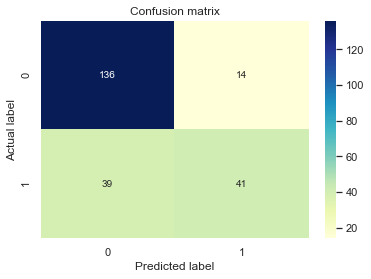

In [32]:
from sklearn.model_selection import KFold

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

y_pred = knn.predict(Xtest)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Ytest, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [34]:
# Kfold cross-validation
from sklearn.datasets import make_classification
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

for train_ix, test_ix in kfold.split(X, Y):
    
    train_X, test_X = X[train_ix], X[test_ix]
    train_y, test_y = y[train_ix], y[test_ix]
    
    train_0, train_1 = len(train_y[train_y==0]), len(train_y[train_y==1])
    test_0, test_1 = len(test_y[test_y==0]), len(test_y[test_y==1])
    print('>Train: 0=%d, 1=%d, Test: 0=%d, 1=%d' % (train_0, train_1, test_0, test_1))

>Train: 0=400, 1=213, Test: 0=100, 1=54
>Train: 0=400, 1=213, Test: 0=100, 1=54
>Train: 0=400, 1=214, Test: 0=100, 1=53
>Train: 0=400, 1=214, Test: 0=100, 1=53
>Train: 0=400, 1=214, Test: 0=100, 1=53
